# Homework 3 of Yiming Sun (ys3031), EECS 6894

# Problem 1

Our topic is "Reseach on data augmentation with deep neural networks". Data Augmentation is a very efficient way to enrich the traning and testing dataset when a very limited dataset only is accessible. 

In this project, we would like to implement the idea of this paper (https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf). Say we are training a model that predicts which artist a specific painting is composed of. We would compare the model that trained on (1) limited dataset, with only several painting for each artist and (2) expanded dataset augmented by the paper mentioned above.

# Problem 2

In [26]:
# The first layer is composed of one conv layer, alone with one batch normalization layer.
conv1=9472+256

# The second layer is composed of three sub-layers - 2a, 2b, 2c. Sub-layer 2a has different structure, whereas 2b and 2c share the same structure.
# Sub-layer 2a has four conv branches, with param# 4160, 36928, 16640, 16640 respectively, and four batch normalization layers, with param# 256, 256, 16640, 1024 respectively 
conv2a=4160+256+36928+256+16640+16640+1024+1024

# Sub-layers 2b and 2c has three conv layers, with param# 16448, 36928 and 16640 respectively, and three BN layers, with param# 256, 256 and 1024 respectively.
conv2b=16448+256+36928+256+16640+1024 
conv2c=16448+256+36928+256+16640+1024

# The third layer is composed of four sub-layers - 3a, 3b, 3c, and 3d. Layer 3a has different structure, whereas 3b, 3c and 3d share the same structure.
# Sub-layer 3a has four conv layers, with param# 32896, 147584, 66048, 131584 respectively, and four batch normalization layers, with param# 512, 512, 2048, 2048 respectively 
conv3a=32896+512+147584+512+66048+131584+2048+2048

# Sub-layer 3b, 3c and 3d have three conv layers, with param# 65664, 147584, and 66048, and three batch normalization layers, with param# 512, 512, 512
conv3b=65664+512+147584+512+66048+2048
conv3c=65664+512+147584+512+66048+2048                                                                 
conv3d=65664+512+147584+512+66048+2048

# The fourth layer is composed of six sub-layers - 4a, 4b, 4c, 4d, 4e, and 4f. Layer 4a has different structure, whereas 4b to 4f share the same structure.
# Sub-layer 4a has four conv layers, with param# 131328, 590080, 263168, 525312 respectively, and four batch normalization layers, with param# 1024, 1024, 4096, 4096 respectively 
conv4a=131328+1024+590080+1024+263168+525312+4096+4096

# Sub-layer 4b to 4f have three conv layers, with param# 262400, 590080, and 263168, and three batch normalization layers, with param# 1024, 1024, 4096
conv4b=262400+1024+590080+1024+263168+4096
conv4c=262400+1024+590080+1024+263168+4096                                                                 
conv4d=262400+1024+590080+1024+263168+4096
conv4e=262400+1024+590080+1024+263168+4096
conv4f=262400+1024+590080+1024+263168+4096

# The fifth layer is composed of three sub-layers - 5a, 5b, 5c. Layer 5a has different structure, whereas 5b and 5c share the same structure.
# Sub-layer 5a has four conv layers, with param# 524800, 2359808, 1050624, 2099200 respectively, and four batch normalization layers, with param# 2048, 2048, 8192, 8192 respectively 
conv5a=524800+2048+2359808+2048+1050624+2099200+8192+8192

# Sub-layer 5b and 5c have three conv layers, with param# 1049088, 2359808, and 1050624, and three batch normalization layers, with param# 2048, 2048, 8192
conv5b=1049088+2048+2359808+2048+1050624+8192                                                                 
conv5c=1049088+2048+2359808+2048+1050624+8192

#
convfc=2049000

conv2 = conv2a+conv2b+conv2c
conv3 = conv3a+conv3b+conv3c+conv3c
conv4 = conv4a+conv4b+conv4c+conv4d+conv4e+conv4f
conv5 = conv5a+conv5b+conv5c

print("conv1:", conv1)
print("conv2:", conv2)
print("conv3:", conv3)
print("conv4:", conv4)
print("conv5:", conv5)

print("The number of all layers by my calculation:", conv1+conv2a+conv2b+conv2c+conv3a+conv3b+conv3c+conv3d+conv4a+conv4b+conv4c+conv4d+conv4e+conv4f+conv5a+conv5b+conv5c+convfc)
print("The result of count_params():", model_resnet50.count_params())

conv1: 9728
conv2: 220032
conv3: 1230336
conv4: 7129088
conv5: 14998528
The number of all layers by my calculation: 25636712
The result of count_params(): 25636712


# Problem 3

In [5]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16
import os

def data_aug(category, starname):
    for filename in os.listdir(os.path.join("data_origin", category, starname)):
        if filename.endswith(".jpg"):
            filenameandpath = os.path.join("data_origin", category, starname, filename)
            print(filenameandpath)
            img = load_img(os.path.join("data_origin", category, starname, filename))
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)
            i = 0
            datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
            for _ in datagen.flow(img_array, 
                                  batch_size=1, 
                                  save_to_dir=os.path.join("data_expanded", category, starname), 
                                  save_prefix=starname, 
                                  save_format="jpeg"):
                i += 1
                if i > 50:
                    break
                    
data_aug("train", "jennifer")
data_aug("validation", "jennifer")
data_aug("train", "justin")
data_aug("validation", "justin")

data_origin/train/jennifer/1-FaceId-0.jpg
data_origin/train/jennifer/6-FaceId-0.jpg
data_origin/train/jennifer/7-FaceId-0.jpg
data_origin/train/jennifer/2-FaceId-0.jpg
data_origin/train/jennifer/5-FaceId-0.jpg
data_origin/train/jennifer/10-FaceId-0.jpg
data_origin/train/jennifer/4-FaceId-0.jpg
data_origin/train/jennifer/3-FaceId-0.jpg
data_origin/train/jennifer/9-FaceId-0.jpg
data_origin/train/jennifer/8-FaceId-0.jpg
data_origin/validation/jennifer/19-FaceId-0.jpg
data_origin/validation/jennifer/18-FaceId-0.jpg
data_origin/validation/jennifer/12-FaceId-0.jpg
data_origin/validation/jennifer/15-FaceId-0.jpg
data_origin/validation/jennifer/14-FaceId-0.jpg
data_origin/validation/jennifer/13-FaceId-0.jpg
data_origin/validation/jennifer/11-FaceId-0.jpg
data_origin/validation/jennifer/16-FaceId-0.jpg
data_origin/validation/jennifer/20-FaceId-0.jpg
data_origin/validation/jennifer/17-FaceId-0.jpg
data_origin/train/justin/1-FaceId-0.jpg
data_origin/train/justin/6-FaceId-0.jpg
data_origin/train/j

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras import regularizers

img_width, img_height = 224, 224

train_data_dir = 'data_expanded/train'
validation_data_dir = 'data_expanded/validation'
epochs = 10
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


model_vgg = VGG16(input_shape=input_shape, include_top=False)

model = Sequential()

model.add(model_vgg)
top_model = Sequential()
top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
top_model.add(Dense(256))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.8))
top_model.add(Dense(2))
top_model.add(Activation('softmax'))

model.add(top_model)

model.layers[0].trainable = False 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit_generator(
        train_generator,
        steps_per_epoch=500 // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=200 // batch_size)

top_model.save_weights("./vgg16_top_model.h5")


print("The result of evaluation on test/validation dataset")
model.evaluate_generator(validation_generator)

Found 996 images belonging to 2 classes.
Found 995 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 161s 6s/step - loss: 4.9804 - acc: 0.5420 - val_loss: 1.8891 - val_acc: 0.6250
Epoch 2/10
25/25 [==============================] - 159s 6s/step - loss: 3.1327 - acc: 0.6760 - val_loss: 0.1504 - val_acc: 0.9250
Epoch 3/10
25/25 [==============================] - 164s 7s/step - loss: 0.6569 - acc: 0.8305 - val_loss: 0.2637 - val_acc: 0.9050
Epoch 4/10
25/25 [==============================] - 163s 7s/step - loss: 0.2561 - acc: 0.8900 - val_loss: 0.1263 - val_acc: 0.9350
Epoch 5/10
25/25 [==============================] - 172s 7s/step - loss: 0.2086 - acc: 0.9180 - val_loss: 0.1402 - val_acc: 0.9250
Epoch 6/10
25/25 [==============================] - 163s 7s/step - loss: 0.2162 - acc: 0.8870 - val_loss: 0.1134 - val_acc: 0.9500
Epoch 7/10
25/25 [==============================] - 169s 7s/step - loss: 0.1782 - acc: 0.9120 - val_loss: 0.1273 - val_acc: 0.9450
E

[0.1667203050219084, 0.9286432068551606]

In [8]:
loss, acc = model.evaluate_generator(validation_generator)
print("Loss of evaluation:", loss)
print("Accuracy of evaluation:", acc)

Loss of evaluation: 0.16672030557414994
Accuracy of evaluation: 0.928643212845577


In [9]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img

def predict_jennifer_or_justin(img_path):
    img_selfie = load_img(img_path, target_size=(224, 224))
    selfie_array = img_to_array(img_selfie)
    selfie_array = selfie_array.reshape((1,) + selfie_array.shape)
    selfie_array /= 255.0
    result = model.predict_classes(selfie_array)
    print(result)

In [12]:
print("Jennifer:0, Justin: 1")
print("Result of my self:")
predict_jennifer_or_justin('./selfie/sunyiming.jpeg')
print("Result of justin:")
predict_jennifer_or_justin('./selfie/justin.jpeg')
print("Result of jennifer")
predict_jennifer_or_justin('./selfie/jennifer.jpeg')

Jennifer:0, Justin: 1
Result of my self:
[1]
Result of justin:
[1]
Result of jennifer
[0]


# Problem 4

In [13]:
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import LBFGSAttack
from foolbox.criteria import TargetClassProbability
from keras import backend
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np

backend.set_learning_phase(0)
path = './selfie/jennifer.jpeg'

jennifer_image = load_img(path, target_size=(224,224))
jennifer_array = img_to_array(jennifer_image)
jennifer_array = jennifer_array / 255.0
label = 0

preprocessing = (np.array([104/255.0, 116/255.0, 123/ 255.0]), 1)
fmodel = KerasModel(model, bounds=(0, 1), preprocessing=preprocessing)
attack = LBFGSAttack(model=fmodel, criterion=TargetClassProbability(1-label, p=0.8))
adver_jennifer_array = attack(jennifer_array, label)

print("Jennifer:0, Justin: 1")
print("The prediction of attacked Jennifer picture:", np.argmax(fmodel.predictions(adver_jennifer_array)))
print("The prediction of origin Jennifer picture", np.argmax(fmodel.predictions(jennifer_array)))

adver_jennifer_image = array_to_img(adver_jennifer_array)

Jennifer:0, Justin: 1
The prediction of attacked Jennifer picture: 1
The prediction of origin Jennifer picture 0


The attacked Jennifer image


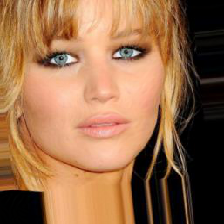

In [14]:
print("The attacked Jennifer image")
adver_jennifer_image

The origin Jennifer image


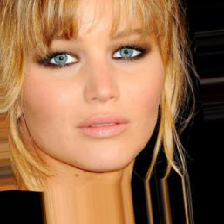

In [15]:
print("The origin Jennifer image")
jennifer_image